<b><h3>What is clustering ?</h3></b>

<p>Clustering is a type of unsupervised machine learning technique used to group similar data points together. The idea is to organize data into clusters (or groups) so that items in the same cluster are more similar to each other than to those in other clusters.</p>

In Simple Terms:
Clustering = Grouping similar things together
For example, think of sorting fruits into groups based on their color or size - apples and strawberries might go into one group (red fruits), bananas and lemons into another (yellow fruits), etc.

<b><h4> Example 1: Customer Segmentation using K-Means</h4></b>
<p>Imagine an e-commerce platform wants to segment customers based on Annual Income and Spending Score.</p>

<b>"If the Spending Score (or any column like 'Spending Hours') is randomly different — how can we still form groups using clustering?"

✅ Answer: KMeans clustering still works, because it doesn't care about order — it finds patterns by grouping similar data points based on their distance from each other.</b>

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = {
    'Annual Income': [15, 16, 17, 90, 95, 100, 50, 52, 48],
    'Spending Score': [39, 40, 36, 80, 85, 83, 60, 58, 62]
}
df = pd.DataFrame(data)

df.index=range(1,len(df)+1)
df

,Annual Income,Spending Score
1,15,39
2,16,40
3,17,36
4,90,80
5,95,85
6,100,83
7,50,60
8,52,58
9,48,62


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


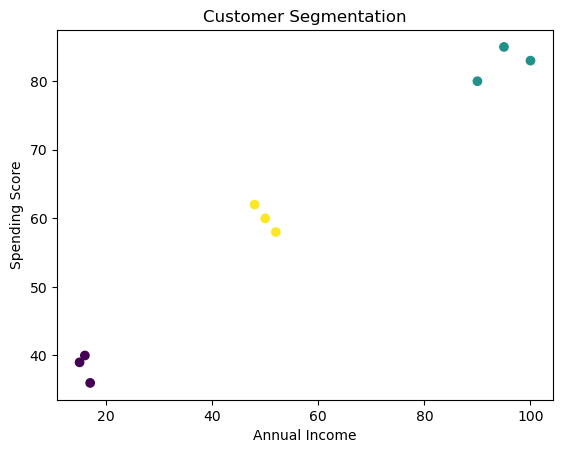

In [3]:
#KMeans clustering
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(df[['Annual Income', 'Spending Score']])

# Plot
plt.scatter(df['Annual Income'], df['Spending Score'], c=df['Cluster'], cmap='viridis')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation")
plt.show()

In [4]:
df['Cluster']

1    0
2    0
3    0
4    1
5    1
6    1
7    2
8    2
9    2
Name: Cluster, dtype: int32

<b>Example 2: City Pollution Clustering (Air Quality Data)</b>
<p>Group cities based on air quality (PM2.5, PM10, NO2).</p>

In [5]:
data={
    'City':['A','B','C','D','E'],
    'PM2.5': [30, 45, 20, 80, 90],
    'PM10': [50, 60, 40, 100, 110],
    'NO2': [20, 30, 15, 70, 75]
}

df=pd.DataFrame(data)
df.index=range(1,len(df) + 1)
df

,City,PM2.5,PM10,NO2
1,A,30,50,20
2,B,45,60,30
3,C,20,40,15
4,D,80,100,70
5,E,90,110,75


In [6]:
kmeans = KMeans(n_clusters=2)
df['Cluster'] = kmeans.fit_predict(df[['PM2.5', 'PM10', 'NO2']])
print(df[['City', 'Cluster']])

  City  Cluster
1    A        0
2    B        0
3    C        0
4    D        1
5    E        1


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<b>📍 Example 3: Students' Performance Grouping</b>
<p>Cluster students based on Math and Science scores.</p>

In [7]:
data = {
    'Math Score': [85, 89, 90, 45, 50, 40, 60, 62],
    'Science Score': [88, 86, 92, 42, 45, 38, 58, 60]
}

df=pd.DataFrame(data)
df.index=range(1,len(df) + 1)
df

,Math Score,Science Score
1,85,88
2,89,86
3,90,92
4,45,42
5,50,45
6,40,38
7,60,58
8,62,60


   Math Score  Science Score  Cluster  Performance Level
1          85             88        1     High Performer
2          89             86        1     High Performer
3          90             92        1     High Performer
4          45             42        0  Average Performer
5          50             45        0  Average Performer
6          40             38        0  Average Performer
7          60             58        0  Average Performer
8          62             60        0  Average Performer


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


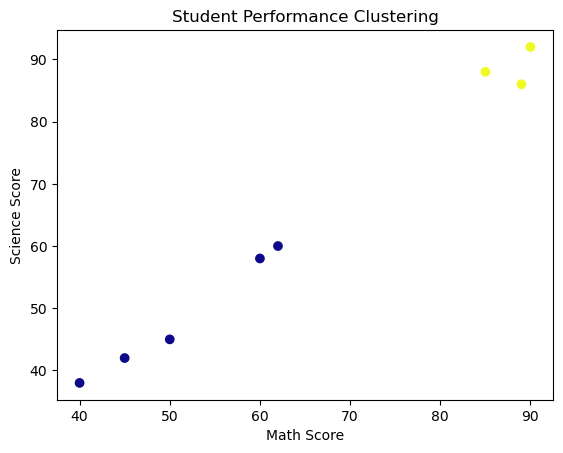

In [8]:
kmeans=KMeans(n_clusters=2)
df['Cluster']=kmeans.fit_predict(df[['Math Score','Science Score']])
label_map = {
    0: 'Average Performer',
    1: 'High Performer'
}
df['Performance Level'] = df['Cluster'].map(label_map)
print(df[['Math Score','Science Score','Cluster','Performance Level']])
plt.scatter(df['Math Score'], df['Science Score'], c=df['Cluster'], cmap='plasma')
plt.xlabel("Math Score")
plt.ylabel("Science Score")
plt.title("Student Performance Clustering")
plt.show()

In [9]:
df=pd.read_csv('FMCG Products.csv')
df.index=range(1,len(df) + 1)
df

,Product_Name,Description,Price
1,Tata Salt,Iodized vacuum evaporated salt for everyday co...,₹22
2,Maggi Noodles,Instant noodles with masala flavor packet,₹14
3,Amul Butter,Pasteurized table butter made from fresh cream,₹55
4,Parle-G Biscuits,Glucose biscuits popular for tea time snacking,₹10
5,Surf Excel Detergent,Stain removal detergent powder for clothes,₹140
...,...,...,...
94,Bailley Water,Purified drinking water in bottle,₹18
95,Fem Bleach Cream,Facial hair lightening cream,₹75
96,Pidilite Fevicol,White adhesive for paper and wood,₹35
97,Chandrika Soap,Ayurvedic bathing soap with natural herbs,₹35


In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Load the dataset - you need to add this line first
df = pd.read_csv('FMCG Products.csv')

# Create the text column by combining product name and description
df['Text'] = df['Product_Name'] + " " + df['Description']

# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Text'])

# Apply K-means clustering
kmeans = KMeans(n_clusters=22, random_state=42)  # Added n_init parameter
df['Clusters'] = kmeans.fit_predict(X)

# Create a mapping for categories
category = {
    0: 'soap',
    1: 'shampoo',
    2: 'oil',
    3: 'detergent',
    4: 'toothpaste',
    5: 'tea',
    6: 'coffee',
    7: 'biscuit',
    8: 'masala',
    9: 'cleaner',
    10: 'cream',
    11: 'powder',
    12: 'milk',
    13: 'juice',
    14: 'flour',
    15: 'rice',
    16: 'noodles',
    17: 'snack',
    18: 'drink',
    19: 'hair',
    20: 'face',
    21: 'wash'
}

# Map clusters to categories
df['category'] = df['Clusters'].map(category)

# Save the categorized data to a CSV file
df.to_csv('final.csv')

# Print the results - make sure column name matches what you created ('category' not 'Category')
print(df[['Product_Name', 'category']])

                 Product_Name   category
0                   Tata Salt      juice
1               Maggi Noodles     masala
2                 Amul Butter       face
3            Parle-G Biscuits     powder
4        Surf Excel Detergent  detergent
..                        ...        ...
93              Bailley Water       face
94           Fem Bleach Cream       soap
95           Pidilite Fevicol       face
96             Chandrika Soap        oil
97  Fiama Di Wills Shower Gel        oil

[98 rows x 2 columns]


In [12]:
df=pd.read_csv('final.csv')
df

,Unnamed: 0,Product_Name,Description,Price,Text,Clusters,category
0,0,Tata Salt,Iodized vacuum evaporated salt for everyday co...,₹22,Tata Salt Iodized vacuum evaporated salt for e...,13,juice
1,1,Maggi Noodles,Instant noodles with masala flavor packet,₹14,Maggi Noodles Instant noodles with masala flav...,8,masala
2,2,Amul Butter,Pasteurized table butter made from fresh cream,₹55,Amul Butter Pasteurized table butter made from...,20,face
3,3,Parle-G Biscuits,Glucose biscuits popular for tea time snacking,₹10,Parle-G Biscuits Glucose biscuits popular for ...,11,powder
4,4,Surf Excel Detergent,Stain removal detergent powder for clothes,₹140,Surf Excel Detergent Stain removal detergent p...,3,detergent
...,...,...,...,...,...,...,...
93,93,Bailley Water,Purified drinking water in bottle,₹18,Bailley Water Purified drinking water in bottle,20,face
94,94,Fem Bleach Cream,Facial hair lightening cream,₹75,Fem Bleach Cream Facial hair lightening cream,0,soap
95,95,Pidilite Fevicol,White adhesive for paper and wood,₹35,Pidilite Fevicol White adhesive for paper and ...,20,face
96,96,Chandrika Soap,Ayurvedic bathing soap with natural herbs,₹35,Chandrika Soap Ayurvedic bathing soap with nat...,2,oil


<b>Basic Example</b>

In [54]:
import pandas as pd
from sklearn.cluster import KMeans

In [55]:
data={
    'Student':['A','B','C','D','E','F'],
    'Marks':[45,67,87,90,55,77]
}

df=pd.DataFrame(data)
df.index=range(1,len(df) + 1)
df

,Student,Marks
1,A,45
2,B,67
3,C,87
4,D,90
5,E,55
6,F,77


In [64]:
kmeans=KMeans(n_clusters=3,random_state=0)
df['Clusters']=kmeans.fit_predict(df[['Marks']])
df_sort=df.sort_values(by='Marks',ascending=False)
print(df_sort[['Student','Marks','Clusters']])

  Student  Marks  Clusters
4       D     90         0
3       C     87         0
6       F     77         2
2       B     67         2
5       E     55         1
1       A     45         1


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [2]:
import pandas as pd
from sklearn.cluster import KMeans

In [3]:
data={
    'Product':['Soap','Shampoo','Limca','Fanta','Coca-cola','Butter','Cheese','Milk'],
    'Price':[35,10,20,20,20,225,125,30]
}

df=pd.DataFrame(data)
df.index=range(1,len(df) + 1)
df

,Product,Price
1,Soap,35
2,Shampoo,10
3,Limca,20
4,Fanta,20
5,Coca-cola,20
6,Butter,225
7,Cheese,125
8,Milk,30


In [6]:
kmeans=KMeans(n_clusters=3,random_state=0)
df['Clusters']=kmeans.fit_predict(df[['Price']])
data_sort_values=df.sort_values(by='Price',ascending=False)
print(data_sort_values[['Product','Price','Clusters']])

     Product  Price  Clusters
6     Butter    225         1
7     Cheese    125         2
1       Soap     35         0
8       Milk     30         0
3      Limca     20         0
4      Fanta     20         0
5  Coca-cola     20         0
2    Shampoo     10         0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [29]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
data = {
    "CustomerName": [
        "Amit Sharma", "Priya Mehta", "Rahul Verma", "Sneha Desai", "Vikram Joshi",
        "Neha Kapoor", "Rohan Singh", "Divya Iyer", "Manish Rao", "Anjali Patel",
        "Kunal Bhatia" 
    ],
    "ProductName": [
        "Colgate Toothpaste", "Dove Soap", "Maggie Noodles", "Surf Excel", "Parle-G Biscuits",
        "Dettol Handwash", "Lays Chips", "Tide Detergent", "Amul Butter", "Pepsi Can",
        "Durex Condom"  
    ],
    "ProductDescription": [
        "100g mint-flavored toothpaste for fresh breath",
        "Gentle moisturizing beauty soap, 100g",
        "Instant noodles, masala flavor, 70g pack",
        "Detergent powder for tough stains, 1kg",
        "Classic glucose biscuits, 100g packet",
        "Antibacterial liquid handwash, 250ml",
        "Potato chips, classic salted, 52g pack",
        "Washing powder with extra whiteners, 500g",
        "Salted dairy butter, 500g pack",
        "Soft drink, 330ml can,3 pack",
        "Premium latex condom for safe and protected intimacy"
    ]
}
df = pd.DataFrame(data)
df.index=range(1,len(df) + 1)
df


,CustomerName,ProductName,ProductDescription
1,Amit Sharma,Colgate Toothpaste,100g mint-flavored toothpaste for fresh breath
2,Priya Mehta,Dove Soap,"Gentle moisturizing beauty soap, 100g"
3,Rahul Verma,Maggie Noodles,"Instant noodles, masala flavor, 70g pack"
4,Sneha Desai,Surf Excel,"Detergent powder for tough stains, 1kg"
5,Vikram Joshi,Parle-G Biscuits,"Classic glucose biscuits, 100g packet"
6,Neha Kapoor,Dettol Handwash,"Antibacterial liquid handwash, 250ml"
7,Rohan Singh,Lays Chips,"Potato chips, classic salted, 52g pack"
8,Divya Iyer,Tide Detergent,"Washing powder with extra whiteners, 500g"
9,Manish Rao,Amul Butter,"Salted dairy butter, 500g pack"
10,Anjali Patel,Pepsi Can,"Soft drink, 330ml can,3 pack"


In [30]:
vectorizer=TfidfVectorizer()
x=vectorizer.fit_transform(df['ProductDescription'])
kmeans=KMeans(n_clusters=3,random_state=0)
df['Clusters']=kmeans.fit_predict(x)
df_sort_values=df.sort_values(by='Clusters',ascending=False)
df_sort_values.index=range(1,len(df_sort_values) + 1)
print(df_sort_values[['CustomerName','ProductName','Clusters']])

    CustomerName         ProductName  Clusters
1    Amit Sharma  Colgate Toothpaste         2
2    Priya Mehta           Dove Soap         2
3    Sneha Desai          Surf Excel         2
4    Neha Kapoor     Dettol Handwash         2
5   Kunal Bhatia        Durex Condom         2
6     Divya Iyer      Tide Detergent         1
7    Rahul Verma      Maggie Noodles         0
8   Vikram Joshi    Parle-G Biscuits         0
9    Rohan Singh          Lays Chips         0
10    Manish Rao         Amul Butter         0
11  Anjali Patel           Pepsi Can         0


<h4><b>Question:What are the different categories of daily-use FMCG and lifestyle products that customers usually purchase?</b></h4>

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
data = {
    "CustomerName": [
        "Amit Sharma", "Priya Mehta", "Rahul Verma", "Sneha Desai", "Vikram Joshi",
        "Neha Kapoor", "Rohan Singh", "Divya Iyer", "Manish Rao", "Anjali Patel",
        "Kunal Bhatia", "Ritika Nair", "Suresh Pillai", "Tanya Bose", "Aakash Jain",
        "Meena Reddy", "Ravi Shastri", "Alia Khan", "Nikhil Arora", "Pooja Bhatt"
    ],
    "ProductName": [
        "Colgate Toothpaste", "Dove Soap", "Maggie Noodles", "Surf Excel", "Parle-G Biscuits",
        "Dettol Handwash", "Lays Chips", "Tide Detergent", "Amul Butter", "Pepsi Can",
        "Durex Condom", "iPhone 14", "First Aid Kit", "Heineken Beer", "Nivea Face Cream",
        "Paracetamol Tablet", "Bluetooth Earbuds", "Tropicana Juice", "Whisper Pads", "Lube Gel"
    ],
    "Price": [
        55, 60, 15, 120, 10,
        95, 20, 110, 220, 90,
        150, 75000, 350, 160, 180,
        45, 2999, 99, 40, 250
    ],
    "ProductDescription": [
       "100g mint toothpaste for fresh breath",
        "Gentle moisturizing soap, 100g",
        "Instant masala noodles, 70g pack",
        "Detergent powder for tough stains, 1kg",
        "Classic glucose biscuits, 100g",
        "Antibacterial liquid handwash, 250ml",
        "Classic salted potato chips, 52g",
        "Whitening detergent powder, 500g",
        "Salted dairy butter, 500g pack",
        "Carbonated drink, 330ml can",
        "Latex condom for safe intimacy",
        "Latest model, 128GB storage smartphone",
        "Essential home first-aid supplies",
        "330ml premium lager beer drink bottle",
        "Moisturizing face cream for daily use",
        "Pain relief medicine, 500mg for fever and headaches",
        "Wireless music earbuds, noise-cancelling",
        "Orange drink juice, no added sugar, 1L",
        "Sanitary napkins with wings, 7 pads",
        "Lubricant gel for enhanced intimacy"
    ]
}

df = pd.DataFrame(data)
df.index = range(1, len(df) + 1)
df

,CustomerName,ProductName,Price,ProductDescription
1,Amit Sharma,Colgate Toothpaste,55,100g mint toothpaste for fresh breath
2,Priya Mehta,Dove Soap,60,"Gentle moisturizing soap, 100g"
3,Rahul Verma,Maggie Noodles,15,"Instant masala noodles, 70g pack"
4,Sneha Desai,Surf Excel,120,"Detergent powder for tough stains, 1kg"
5,Vikram Joshi,Parle-G Biscuits,10,"Classic glucose biscuits, 100g"
6,Neha Kapoor,Dettol Handwash,95,"Antibacterial liquid handwash, 250ml"
7,Rohan Singh,Lays Chips,20,"Classic salted potato chips, 52g"
8,Divya Iyer,Tide Detergent,110,"Whitening detergent powder, 500g"
9,Manish Rao,Amul Butter,220,"Salted dairy butter, 500g pack"
10,Anjali Patel,Pepsi Can,90,"Carbonated drink, 330ml can"


In [3]:
vectorizer=TfidfVectorizer()
x=vectorizer.fit_transform(df['ProductDescription'])
kmeans=KMeans(n_clusters=10,random_state=0)
df['Clusters']=kmeans.fit_predict(x)

df_sort_values=df.sort_values(by='Clusters',ascending=False)
df_sort_values.index=range(1,len(df_sort_values) + 1)

Category={
    0:'Personal Care',
    1:'Food & Beverages',
    2:'Household Cleaning',
    3:'Health & Hygiene',
    4:'Contraceptives & Sexual Wellness',
    5:'Medical Essentials',
    6:'Dairy Products',
    7:'Snacks',
    8:'Electronic & Gadgets',
    9:'Beverages'
}

df_sort_values['Category']=df_sort_values['Clusters'].map(Category)
    
print(df_sort_values[['CustomerName','ProductName','Price','Category']])

     CustomerName         ProductName  Price                          Category
1     Neha Kapoor     Dettol Handwash     95                         Beverages
2     Meena Reddy  Paracetamol Tablet     45                         Beverages
3    Nikhil Arora        Whisper Pads     40                         Beverages
4   Suresh Pillai       First Aid Kit    350              Electronic & Gadgets
5     Rahul Verma      Maggie Noodles     15                            Snacks
6     Ritika Nair           iPhone 14  75000                    Dairy Products
7    Ravi Shastri   Bluetooth Earbuds   2999                Medical Essentials
8     Amit Sharma  Colgate Toothpaste     55  Contraceptives & Sexual Wellness
9     Aakash Jain    Nivea Face Cream    180  Contraceptives & Sexual Wellness
10    Priya Mehta           Dove Soap     60  Contraceptives & Sexual Wellness
11   Vikram Joshi    Parle-G Biscuits     10                  Health & Hygiene
12    Rohan Singh          Lays Chips     20        

<b><h4>Where it's used (Real-World Examples):</h4></b>

<b>1. FMCG Companies (e.g., Unilever, P&G, Nestlé)
Use case: Segment customers based on product preferences (e.g., personal care vs food vs cleaning).</b>

Why: Helps them customize marketing campaigns, decide which products to push in which regions, or even bundle products for promotions.

Example: If a cluster of customers frequently buys "Dettol + Paracetamol + Handwash", that’s a health-conscious cluster. So, the company can run targeted ads for new immunity boosters to that group.

<b>2. E-commerce Platforms (e.g., Amazon, Flipkart)
Use case: Recommending products by clustering similar users or browsing histories.</b>

Why: They want to increase sales by suggesting what you’re likely to buy.

Example: If you bought a phone, you might be grouped into a cluster that also tends to buy cases or earbuds. So, they recommend accessories.

<b>3. Retail Chains (e.g., Walmart, Reliance Retail)
Use case: Analyze purchase patterns from billing data.</b>

Why: For store layout planning, product placement, and inventory management.

Example: Clustering may reveal that people buying snacks also buy soft drinks — so those items might be placed nearby in the store.

